In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('Orders.csv')
orders

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176
...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147


In [3]:
customers = pd.read_csv('Customers.csv')
customers

,Customer_ID,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,C001,Delhi,18-25,3.1,Rohan Joshi
1,C002,Bangalore,36-45,4.3,Vivaan Khanna
2,C003,Delhi,26-35,4.6,Mira Rao
3,C004,Mumbai,46-55,4.3,Aarav Sharma
4,C005,Mumbai,36-45,3.2,Dev Patel
...,...,...,...,...,...
195,C196,Pune,36-45,3.6,Rohan Joshi
196,C197,Pune,46-55,4.4,Isha Reddy
197,C198,Delhi,46-55,4.3,Aanya Patel
198,C199,Bangalore,18-25,4.0,Aryan Kumar


In [4]:
restaurants = pd.read_csv('Restaurants.csv')
restaurants

,Restaurant_ID,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours
0,R001,Brew Room,Mumbai,Continental,532,4.3,55,22:00-06:00
1,R002,Domino's Pizza,Chennai,American,939,4.1,483,11:00-22:30
2,R003,KFC,Chennai,Mexican,458,3.8,319,22:00-06:00
3,R004,Brew Room,Bangalore,Thai,280,3.0,84,09:00-23:00
4,R005,Mainland China,Delhi,American,560,4.9,401,11:00-22:30
...,...,...,...,...,...,...,...,...
95,R096,Lavaash by Saby,Mumbai,Japanese,286,4.0,77,00:00-23:59
96,R097,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00
97,R098,Chili's,Pune,American,655,3.4,406,09:00-23:00
98,R099,Rajdhani Thali,Pune,"Indian, Chinese",847,3.7,314,11:00-22:00


# **Analyzing the Orders Dataset**

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Restaurant_ID           1000 non-null   object 
 2   Order_Date              1000 non-null   object 
 3   Expected_Delivery_Time  1000 non-null   int64  
 4   Actual_Delivery_Time    1000 non-null   int64  
 5   Total_Amount            1000 non-null   float64
 6   Order_Status            1000 non-null   object 
 7   Payment_Method          1000 non-null   object 
 8   Dish_Name               1000 non-null   object 
 9   Customer_ID             1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.2+ KB


In [6]:
orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                1000 non-null   object        
 1   Restaurant_ID           1000 non-null   object        
 2   Order_Date              1000 non-null   datetime64[ns]
 3   Expected_Delivery_Time  1000 non-null   int64         
 4   Actual_Delivery_Time    1000 non-null   int64         
 5   Total_Amount            1000 non-null   float64       
 6   Order_Status            1000 non-null   object        
 7   Payment_Method          1000 non-null   object        
 8   Dish_Name               1000 non-null   object        
 9   Customer_ID             1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 78.2+ KB


In [7]:
orders['Month'] = orders['Order_Date'].dt.strftime('%B')
orders

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June
...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March


**In which month are the most orders placed?**

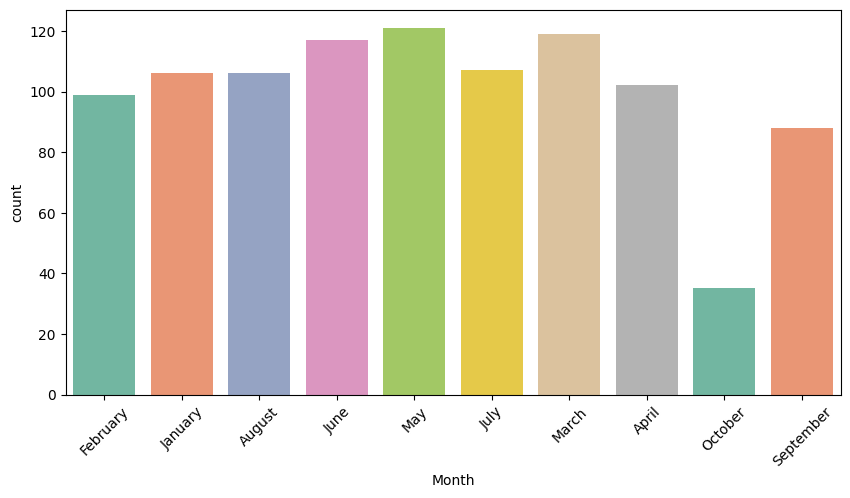

In [8]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Month', data = orders, hue = 'Month', palette = 'Set2')
plt.xticks(rotation = 45)
plt.show()

In [9]:
orders['Hour'] = orders['Order_Date'].dt.strftime('%H')
orders

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February,08
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January,18
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August,12
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February,22
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June,12
...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August,18
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October,00
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July,06
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March,12


In [10]:
orders['Hour'] = orders['Hour'].astype(int)
orders.info()
orders.sort_values(by = 'Hour')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                1000 non-null   object        
 1   Restaurant_ID           1000 non-null   object        
 2   Order_Date              1000 non-null   datetime64[ns]
 3   Expected_Delivery_Time  1000 non-null   int64         
 4   Actual_Delivery_Time    1000 non-null   int64         
 5   Total_Amount            1000 non-null   float64       
 6   Order_Status            1000 non-null   object        
 7   Payment_Method          1000 non-null   object        
 8   Dish_Name               1000 non-null   object        
 9   Customer_ID             1000 non-null   object        
 10  Month                   1000 non-null   object        
 11  Hour                    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), objec

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour
909,O0910,R022,2023-09-07 00:00:00,38,36,337.75,Completed,Cash,Garlic Naan,C127,September,0
962,O0963,R090,2023-09-10 00:00:00,45,43,744.56,Completed,Cash,Egg Fried Rice,C039,September,0
315,O0316,R038,2023-01-03 00:00:00,35,38,566.36,Completed,UPI,Paneer Tikka,C009,January,0
734,O0735,R022,2023-08-31 00:00:00,38,45,692.84,Completed,UPI,Veg Manchurian,C003,August,0
434,O0435,R081,2023-02-20 00:00:00,44,28,399.67,Completed,UPI,Garlic Naan,C131,February,0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,O0493,R005,2023-06-24 22:00:00,45,42,887.17,Completed,Net Banking,Butter Chicken,C193,June,22
495,O0496,R046,2023-06-08 22:00:00,39,39,577.66,Completed,Credit Card,Fish Curry,C132,June,22
692,O0693,R004,2023-10-03 22:00:00,31,27,756.62,Completed,Net Banking,Garlic Naan,C025,October,22
723,O0724,R004,2023-06-29 22:00:00,29,44,926.22,Completed,Net Banking,Garlic Naan,C075,June,22


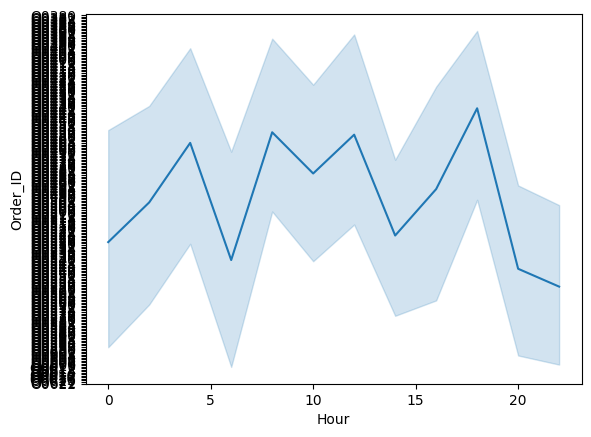

In [11]:
sns.lineplot(x = 'Hour', y = 'Order_ID', data = orders)
plt.show()

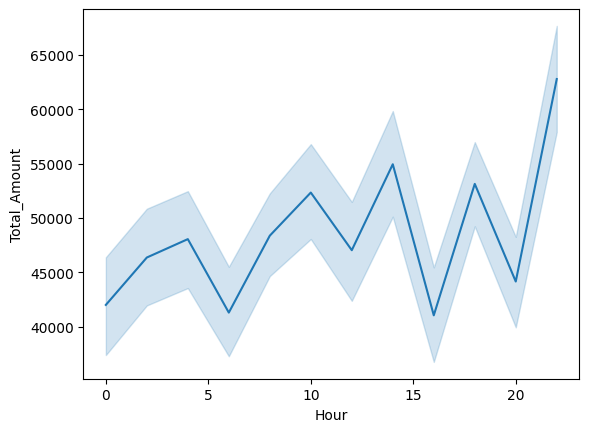

In [12]:
sns.lineplot(x = 'Hour', y = 'Total_Amount', data = orders, estimator = 'sum')
plt.show()

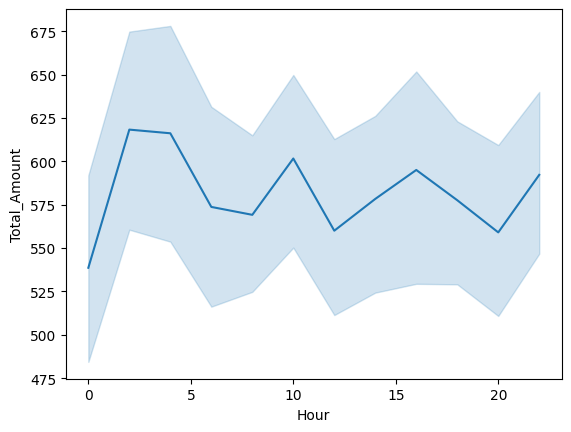

In [13]:
sns.lineplot(x = 'Hour', y = 'Total_Amount', data = orders) #average
plt.show()

In [14]:
orders

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February,8
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January,18
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August,12
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February,22
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June,12
...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August,18
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October,0
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July,6
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March,12


**Count of completed and cancelled orders**

In [15]:
orders['Order_Status'].value_counts()

,count
Order_Status,
Completed,930
Cancelled,70


**Percentage of completed versus cancelled orders**

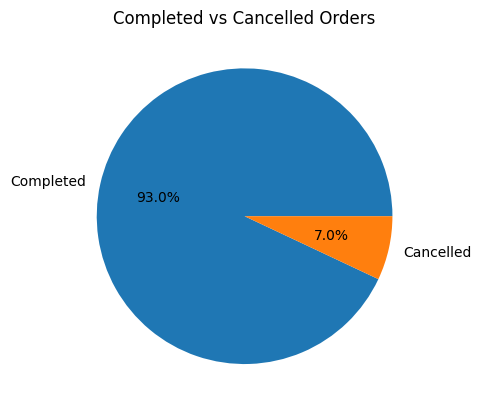

In [16]:
plt.pie(orders['Order_Status'].value_counts(), labels = orders['Order_Status'].value_counts().index, autopct = '%1.1f%%')
plt.title('Completed vs Cancelled Orders')
plt.show()

**Payment Method Distribution: UPI, Cash, Credit Card, Net Banking**

In [17]:
orders['Payment_Method'].value_counts()

,count
Payment_Method,
Cash,263
UPI,262
Credit Card,246
Net Banking,229


**Payment Method Distribution: UPI, Cash, Credit Card, Net Banking (by Percentage)**

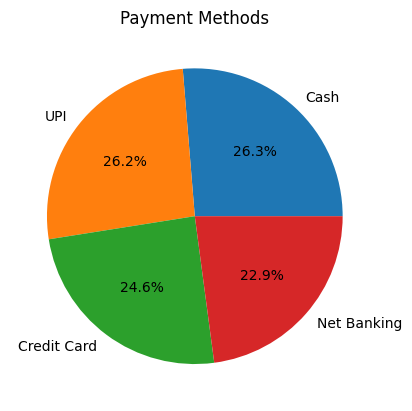

In [18]:
plt.pie(orders['Payment_Method'].value_counts(), labels = orders['Payment_Method'].value_counts().index, autopct = '%1.1f%%')
plt.title('Payment Methods')
plt.show()

**Distribution of Payment Methods by Order Status (Completed vs. Cancelled)**

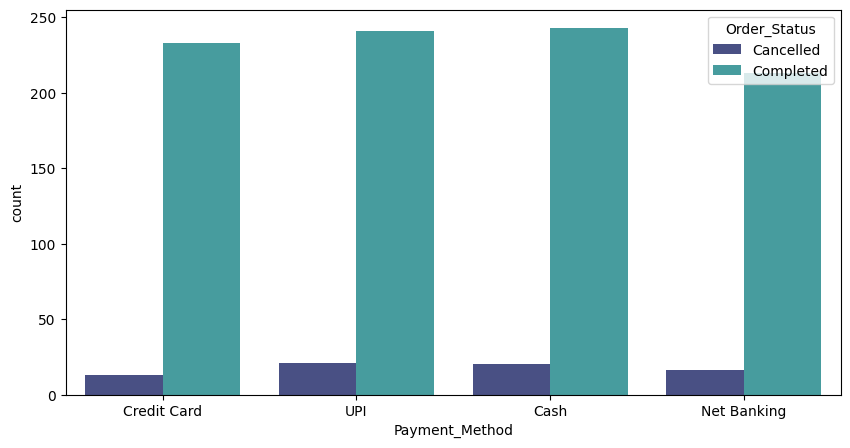

In [19]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Payment_Method', data = orders, hue = 'Order_Status', palette='mako')
plt.show()

<ipython-input-20-788ec2c34da8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(orders['Payment_Method'], palette = 'viridis')


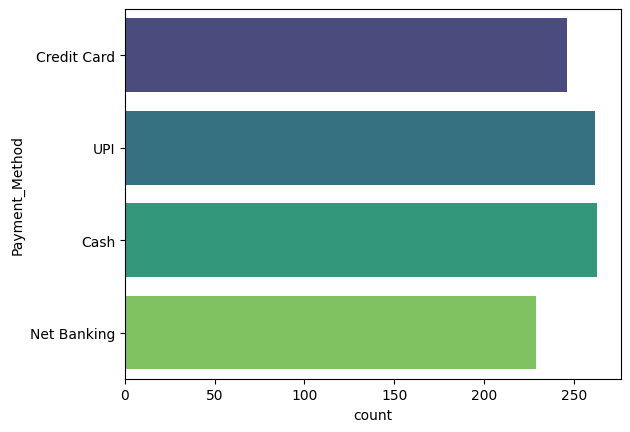

In [20]:
sns.countplot(orders['Payment_Method'], palette = 'viridis')
plt.show()

**Top 10 most ordered dishes**

In [21]:
orders['Dish_Name'].value_counts()[:10]

,count
Dish_Name,
Egg Fried Rice,64
Garlic Naan,57
Paneer Tikka,57
Veg Manchurian,57
Paneer Butter Masala,56
Chicken Shawarma,54
Pasta Alfredo,54
Dal Makhani,53
Mutton Rogan Josh,53


**Distribution of Dishes Ordered (Sorted by Popularity)**

<ipython-input-22-1072f2f81255>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(orders['Dish_Name'], palette = 'Set2', order = sorted_categories)


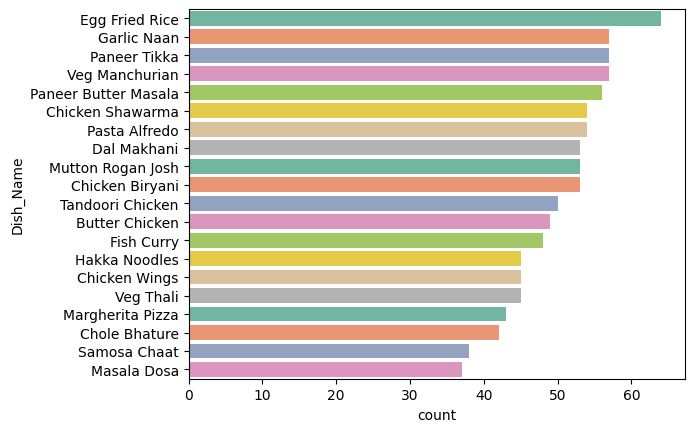

In [22]:
sorted_categories = orders['Dish_Name'].value_counts().index
sns.countplot(orders['Dish_Name'], palette = 'Set2', order = sorted_categories)
plt.show()

**Comparison of Expected and Actual Delivery Time**

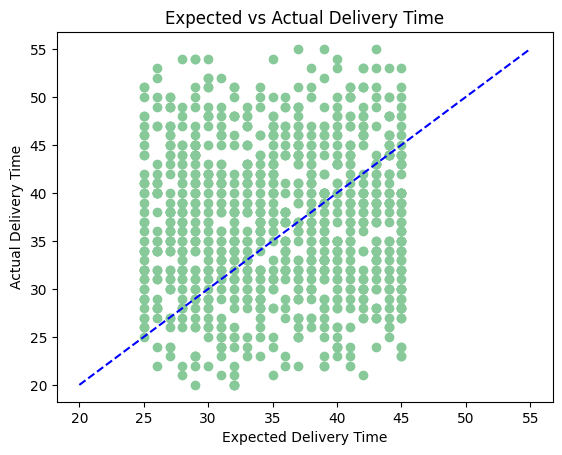

In [23]:
plt.scatter(orders['Expected_Delivery_Time'], orders['Actual_Delivery_Time'], color = '#88c999')
min_value = min(orders['Expected_Delivery_Time'].min(), orders['Actual_Delivery_Time'].min())
max_value = max(orders['Expected_Delivery_Time'].max(), orders['Actual_Delivery_Time'].max())
plt.plot([min_value, max_value], [min_value, max_value], color='blue', linestyle='--', label="On-time")
plt.title('Expected vs Actual Delivery Time')
plt.xlabel('Expected Delivery Time')
plt.ylabel('Actual Delivery Time')
plt.show()

# **Analyzing the Customers Dataset**

In [24]:
customers

,Customer_ID,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,C001,Delhi,18-25,3.1,Rohan Joshi
1,C002,Bangalore,36-45,4.3,Vivaan Khanna
2,C003,Delhi,26-35,4.6,Mira Rao
3,C004,Mumbai,46-55,4.3,Aarav Sharma
4,C005,Mumbai,36-45,3.2,Dev Patel
...,...,...,...,...,...
195,C196,Pune,36-45,3.6,Rohan Joshi
196,C197,Pune,46-55,4.4,Isha Reddy
197,C198,Delhi,46-55,4.3,Aanya Patel
198,C199,Bangalore,18-25,4.0,Aryan Kumar


**Distribution of Customers by Location**

<ipython-input-25-758ed3d36b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(customers['Customer_Location'], palette='Set2', order = sorted_categories)


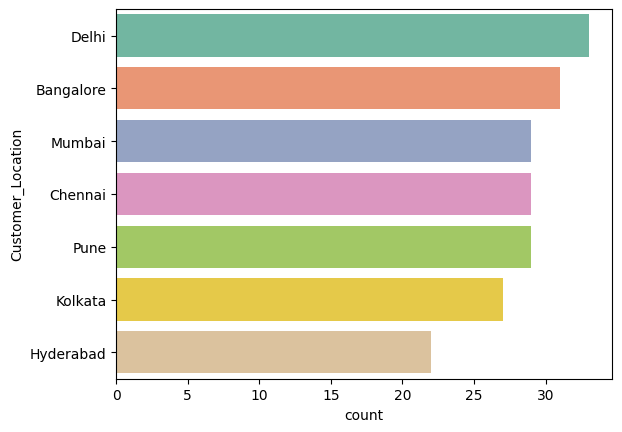

In [25]:
sorted_categories = customers['Customer_Location'].value_counts().index
sns.countplot(customers['Customer_Location'], palette='Set2', order = sorted_categories)
plt.xticks()
plt.show()

**Distribution of Customers by Age Group**

<ipython-input-26-db2a01121a54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(customers['Customer_Age_Group'], palette='Set2', order = sorted_categories)


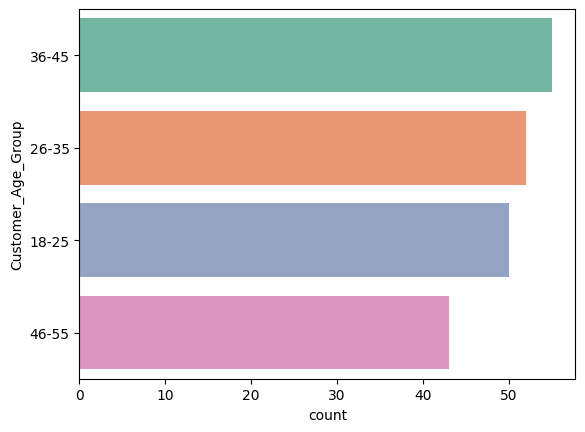

In [26]:
sorted_categories = customers['Customer_Age_Group'].value_counts().index
sns.countplot(customers['Customer_Age_Group'], palette='Set2', order = sorted_categories)
plt.show()

**Analyzing Age Distribution Across Different Cities**

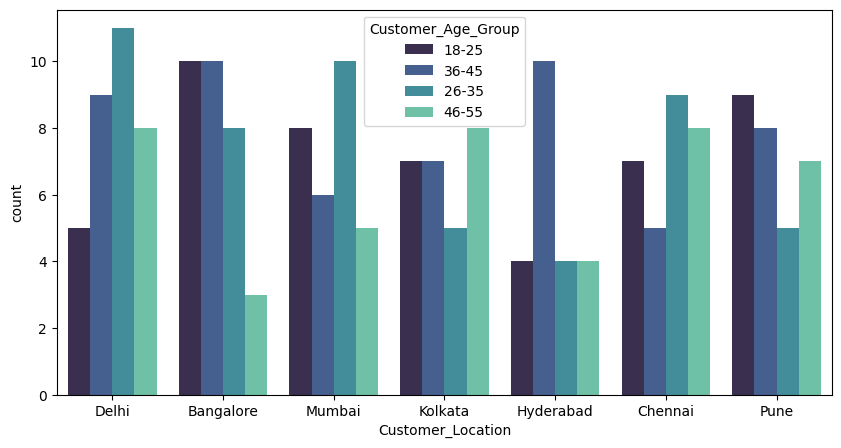

In [27]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Customer_Location', data = customers, hue = 'Customer_Age_Group', palette='mako')
plt.show()

**Counting Frequency of Customer Ratings**

In [28]:
customers['Customer_Rating'].value_counts()

,count
Customer_Rating,
3.8,17
3.4,17
4.4,15
3.1,12
4.1,11
4.9,11
4.8,10
3.6,9
3.9,9


**Distribution of Customer Ratings by Location**

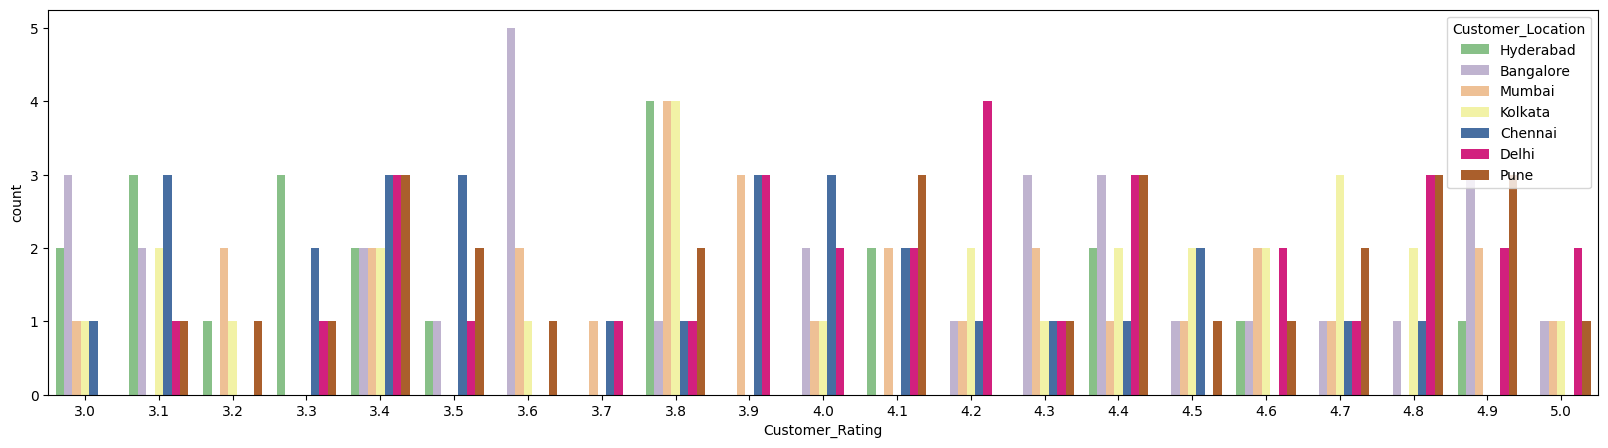

In [29]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Customer_Rating', data = customers, hue = 'Customer_Location', palette='Accent')
plt.show()

**Distribution of Customer Ratings by Age Group**

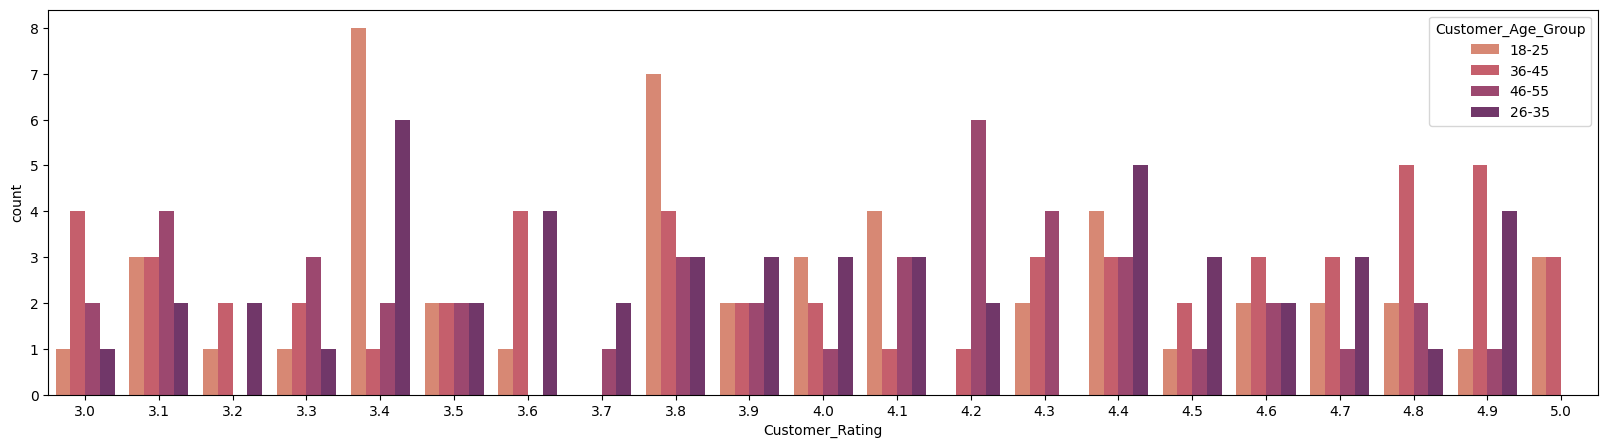

In [30]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Customer_Rating', data = customers, hue = 'Customer_Age_Group', palette='flare')
plt.show()

# **Analyzing the Restaurants Dataset**

In [31]:
restaurants

,Restaurant_ID,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours
0,R001,Brew Room,Mumbai,Continental,532,4.3,55,22:00-06:00
1,R002,Domino's Pizza,Chennai,American,939,4.1,483,11:00-22:30
2,R003,KFC,Chennai,Mexican,458,3.8,319,22:00-06:00
3,R004,Brew Room,Bangalore,Thai,280,3.0,84,09:00-23:00
4,R005,Mainland China,Delhi,American,560,4.9,401,11:00-22:30
...,...,...,...,...,...,...,...,...
95,R096,Lavaash by Saby,Mumbai,Japanese,286,4.0,77,00:00-23:59
96,R097,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00
97,R098,Chili's,Pune,American,655,3.4,406,09:00-23:00
98,R099,Rajdhani Thali,Pune,"Indian, Chinese",847,3.7,314,11:00-22:00


**Frequency of Restaurant Locations**

In [32]:
restaurants['Location'].value_counts()

,count
Location,
Pune,18
Kolkata,16
Chennai,15
Mumbai,14
Delhi,14
Hyderabad,12
Bangalore,11


<ipython-input-33-578d51f6ae16>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(restaurants['Location'], palette='Blues')


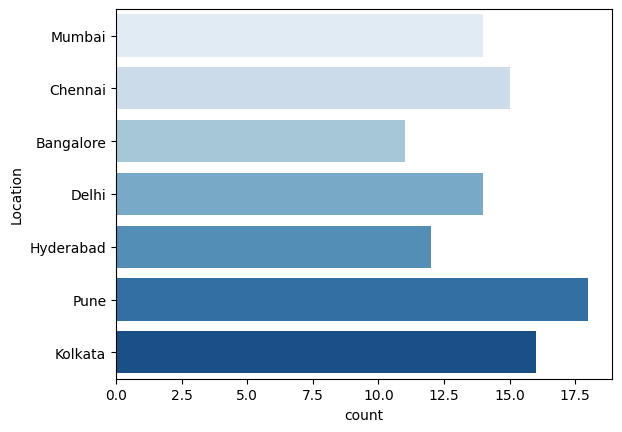

In [33]:
sns.countplot(restaurants['Location'], palette='Blues')
plt.show()

**Frequency of Cuisine Types in Restaurants**

In [34]:
restaurants['Cuisine_Types'].value_counts()

,count
Cuisine_Types,
American,19
"Indian, Chinese",16
Continental,15
Japanese,14
Thai,10
"Italian, Indian",10
Mexican,8
Fast Food,8


<ipython-input-35-636142fcb3d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(restaurants['Cuisine_Types'], palette='BrBG')


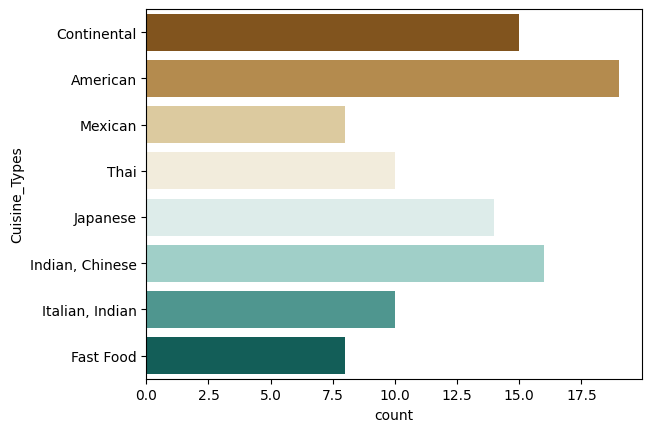

In [35]:
sns.countplot(restaurants['Cuisine_Types'], palette='BrBG')
plt.show()

**Distribution of Cuisine Types by Restaurant Location**

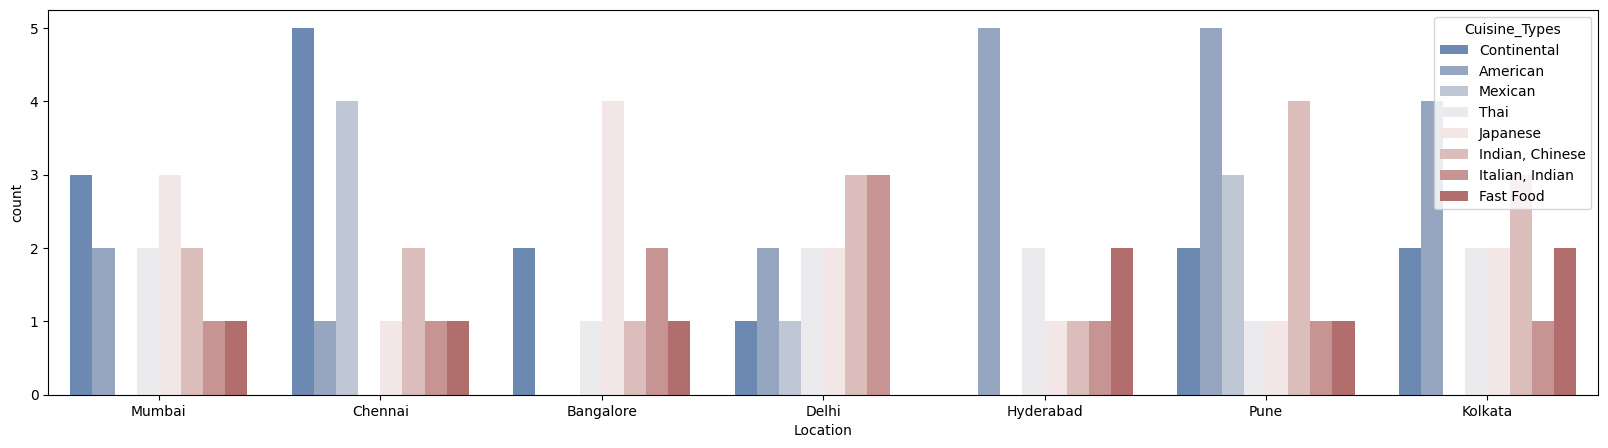

In [36]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Location', data = restaurants, hue = 'Cuisine_Types', palette='vlag')
plt.show()

**Distribution of Restaurant Ratings by Location**

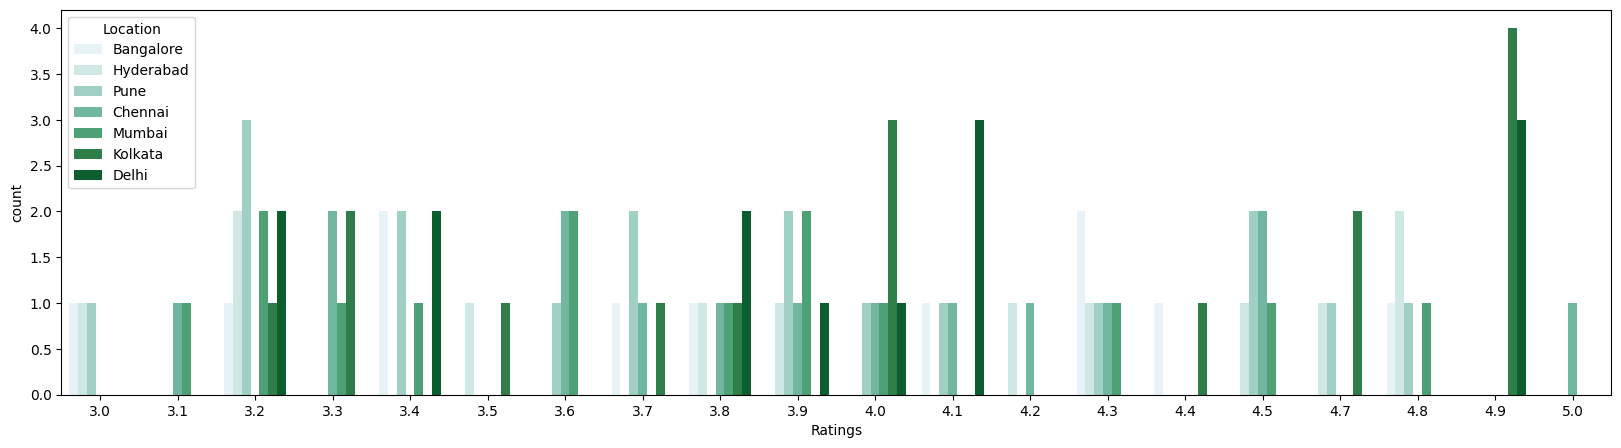

In [37]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Ratings', data = restaurants, hue = 'Location', palette='BuGn')
plt.show()

**Distribution of Restaurant Ratings by Cuisine Type**

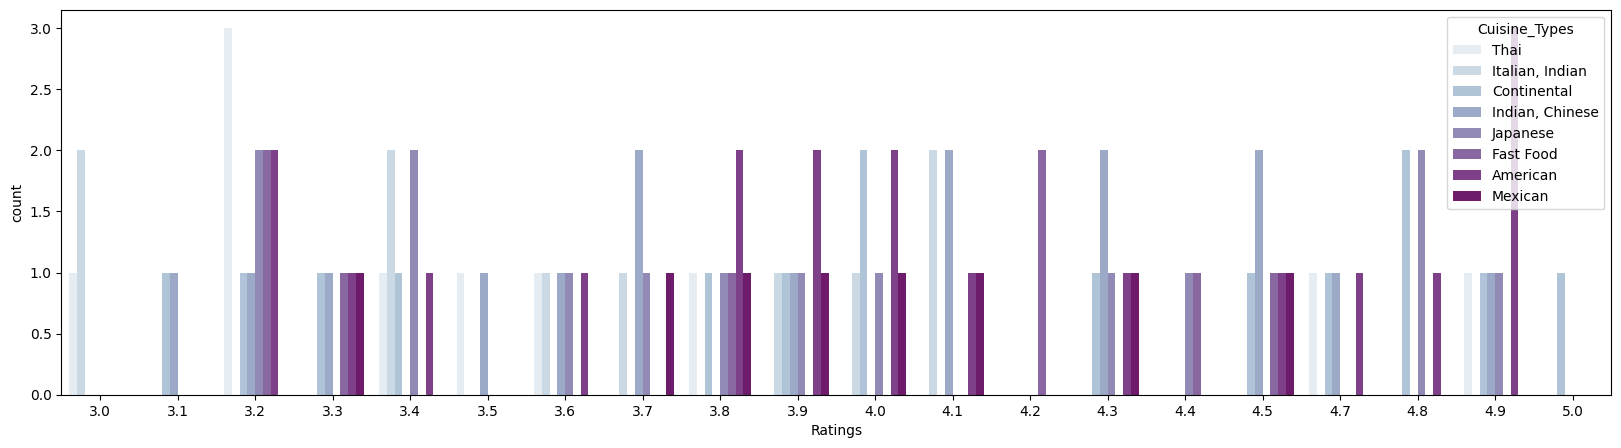

In [38]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Ratings', data = restaurants, hue = 'Cuisine_Types', palette='BuPu')
plt.show()

**Distribution of Cuisine Types by Restaurant Location**

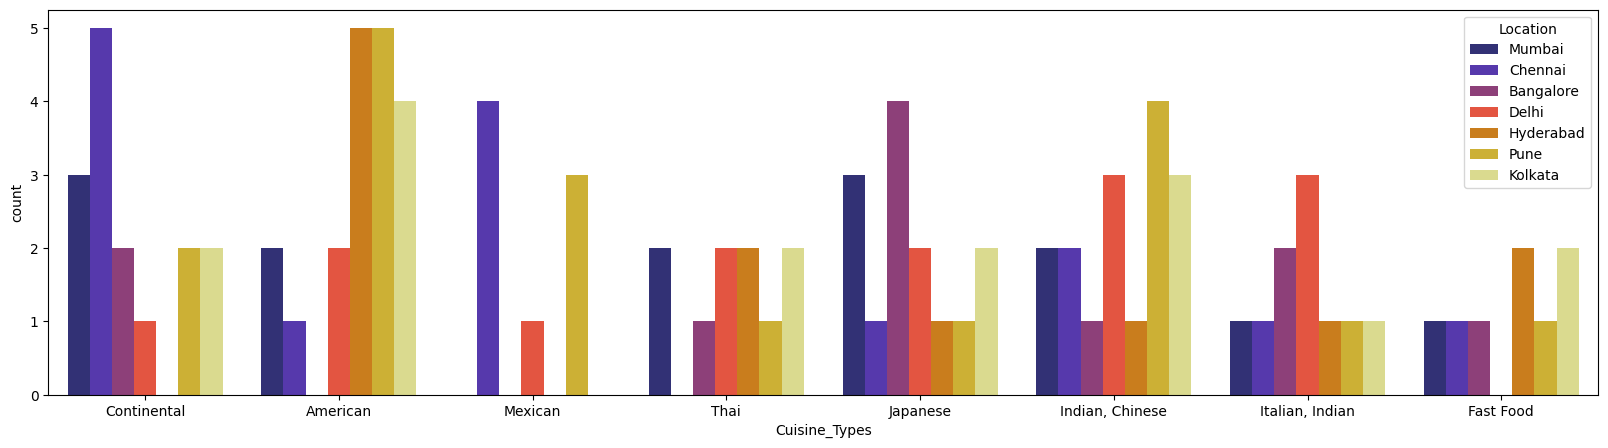

In [39]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Cuisine_Types', data = restaurants, hue = 'Location', palette='CMRmap')
plt.show()

**Relationship Between Restaurant Ratings and Average Cost for Two**

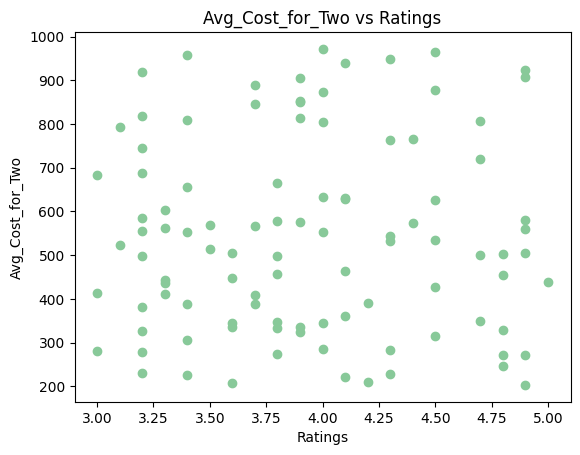

In [40]:
plt.scatter(restaurants['Ratings'], restaurants['Avg_Cost_for_Two'], color = '#88c999')
plt.title('Avg_Cost_for_Two vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Avg_Cost_for_Two')
plt.show()

**Frequency of Operational Hours in Restaurants**

In [41]:
restaurants['Operational_Hours'].value_counts()

,count
Operational_Hours,
09:00-23:00,19
10:00-23:00,19
10:00-22:30,18
11:00-22:00,14
11:00-22:30,11
22:00-06:00,10
00:00-23:59,9


**Distribution of Operational Hours by Restaurant Location**

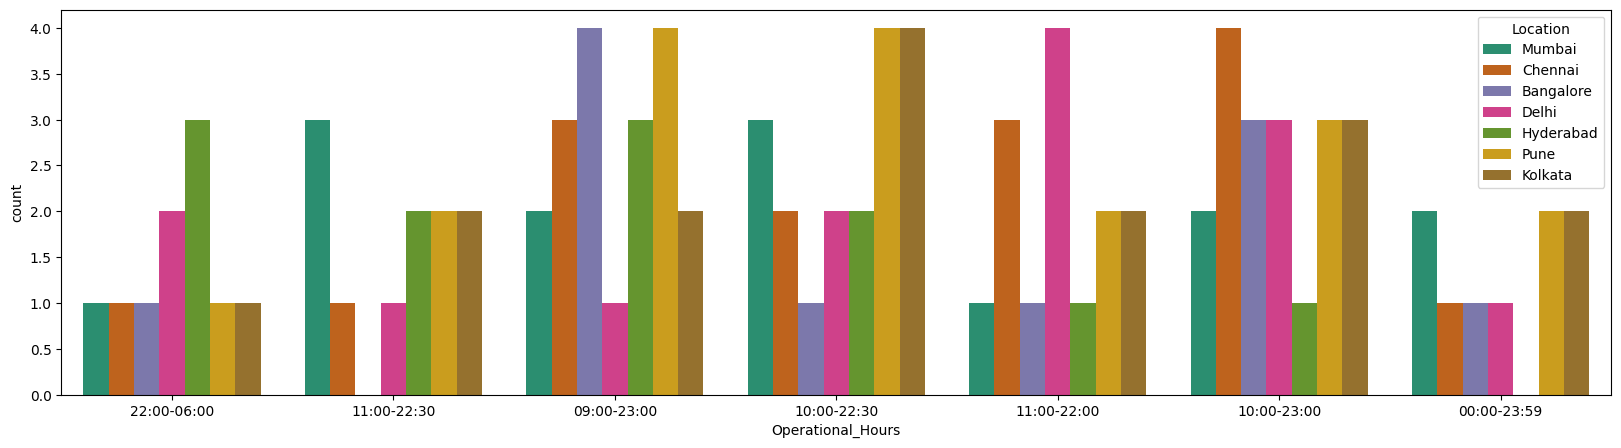

In [42]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Operational_Hours', data = restaurants, hue = 'Location', palette='Dark2')
plt.show()

**Distribution of Restaurant Ratings by Operational Hours**

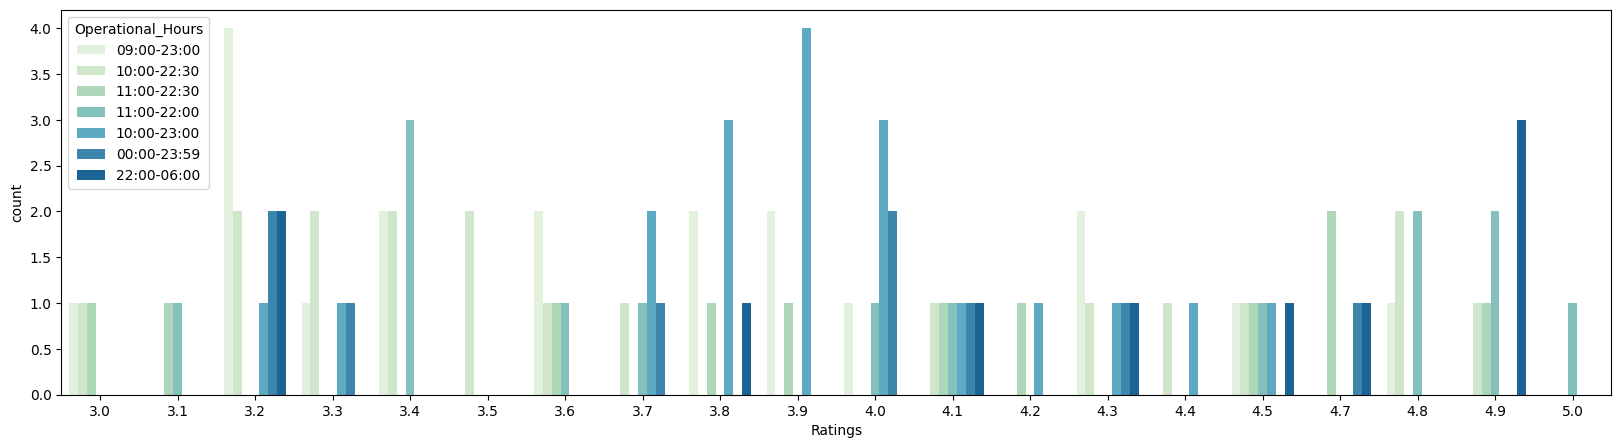

In [43]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'Ratings', data = restaurants, hue = 'Operational_Hours', palette='GnBu')
plt.show()

# **Merging Orders and Customers Data on Customer_ID**

In [44]:
df = pd.merge(left = orders, right = customers, on = 'Customer_ID', how = 'inner')
df

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February,8,Hyderabad,26-35,3.1,Diya Kapoor
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January,18,Delhi,26-35,4.2,Vivaan Khanna
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August,12,Pune,26-35,4.7,Ananya Desai
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February,22,Bangalore,18-25,4.4,Isha Reddy
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June,12,Mumbai,18-25,3.8,Ishaan Mehta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August,18,Mumbai,18-25,3.9,Arjun Yadav
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October,0,Delhi,36-45,5.0,Saanvi Chopra
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July,6,Pune,36-45,4.8,Dev Patel
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March,12,Mumbai,26-35,3.6,Arjun Yadav


**Average spent by customer**

In [45]:
df.groupby('Customer_ID')['Total_Amount'].mean()

,Total_Amount
Customer_ID,
C001,623.620000
C002,733.915000
C003,421.508333
C004,519.800000
C005,530.916667
...,...
C196,556.080000
C197,646.315000
C198,795.577500


**Frequency of order**

In [46]:
frequency = df.groupby('Customer_ID')['Order_ID'].count()
high_frequency_customers = frequency[frequency > 5]
high_frequency_customers

,Order_ID
Customer_ID,
C003,6
C005,6
C006,6
C009,6
C010,7
...,...
C190,6
C191,8
C193,10


**Customers with More Than Two Repeated Orders for the Same Dish**

In [47]:
repeated_order = df.groupby('Customer_ID')['Dish_Name'].value_counts()
repeated_order[repeated_order > 2]

,,count
Customer_ID,Dish_Name,
C025,Hakka Noodles,3
C026,Paneer Tikka,3
C030,Samosa Chaat,3
C084,Butter Chicken,3
C150,Veg Thali,3


**Orders with Delayed Delivery and Cancelled Status**

In [48]:
df[(df['Expected_Delivery_Time']	< df['Actual_Delivery_Time']) & (df['Order_Status'] == 'Cancelled')]


,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February,8,Hyderabad,26-35,3.1,Diya Kapoor
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January,18,Delhi,26-35,4.2,Vivaan Khanna
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February,22,Bangalore,18-25,4.4,Isha Reddy
11,O0012,R017,2023-08-22 08:00:00,27,30,905.24,Cancelled,Credit Card,Mutton Rogan Josh,C182,August,8,Kolkata,46-55,4.2,Ishaan Mehta
14,O0015,R041,2023-01-08 04:00:00,28,54,327.81,Cancelled,Cash,Veg Manchurian,C007,January,4,Hyderabad,18-25,3.8,Krishn Sharma
17,O0018,R072,2023-05-13 12:00:00,42,46,393.15,Cancelled,UPI,Garlic Naan,C197,May,12,Pune,46-55,4.4,Isha Reddy
19,O0020,R079,2023-05-31 12:00:00,44,50,770.18,Cancelled,Cash,Dal Makhani,C011,May,12,Bangalore,18-25,5.0,Saanvi Chopra
20,O0021,R070,2023-07-12 20:00:00,39,46,891.76,Cancelled,Cash,Tandoori Chicken,C198,July,20,Delhi,46-55,4.3,Aanya Patel
22,O0023,R092,2023-05-09 00:00:00,30,51,802.24,Cancelled,UPI,Masala Dosa,C157,May,0,Bangalore,26-35,3.4,Ishaan Mehta
25,O0026,R057,2023-08-08 20:00:00,29,40,537.46,Cancelled,Net Banking,Paneer Tikka,C094,August,20,Kolkata,18-25,4.8,Kavya Gupta


**Customers Who Ordered from the Same Restaurant More Than Twice**

In [49]:
repeat_res = df.groupby('Customer_ID')['Restaurant_ID'].value_counts()
repeat_res[repeat_res > 2]

,,count
Customer_ID,Restaurant_ID,
C158,R018,3


**Restaurants with More Than Ten Orders**

In [50]:
famous_res = df['Restaurant_ID'].value_counts()
famous_res[famous_res > 10]

,count
Restaurant_ID,
R046,22
R081,19
R021,17
R073,16
R100,16
R004,16
R088,15
R050,15
R079,15


**Distribution of Customers by Location**

<ipython-input-51-1ddde975b6e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Customer_Location'], palette='Greens', order = sorted_categories)


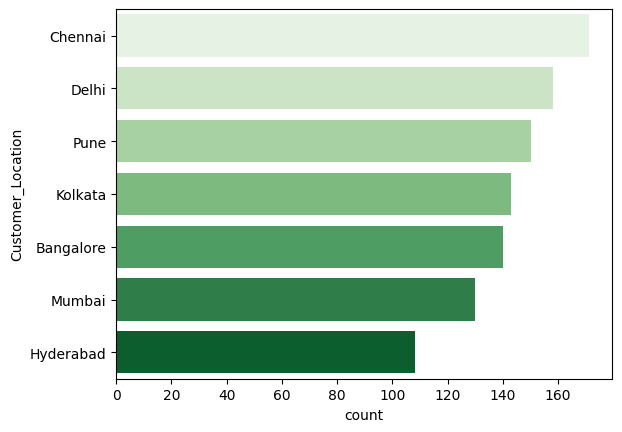

In [51]:
sorted_categories = df['Customer_Location'].value_counts().index
sns.countplot(df['Customer_Location'], palette='Greens', order = sorted_categories)
plt.xticks()
plt.show()

**Distribution of Dishes Ordered by Customer Age Group**

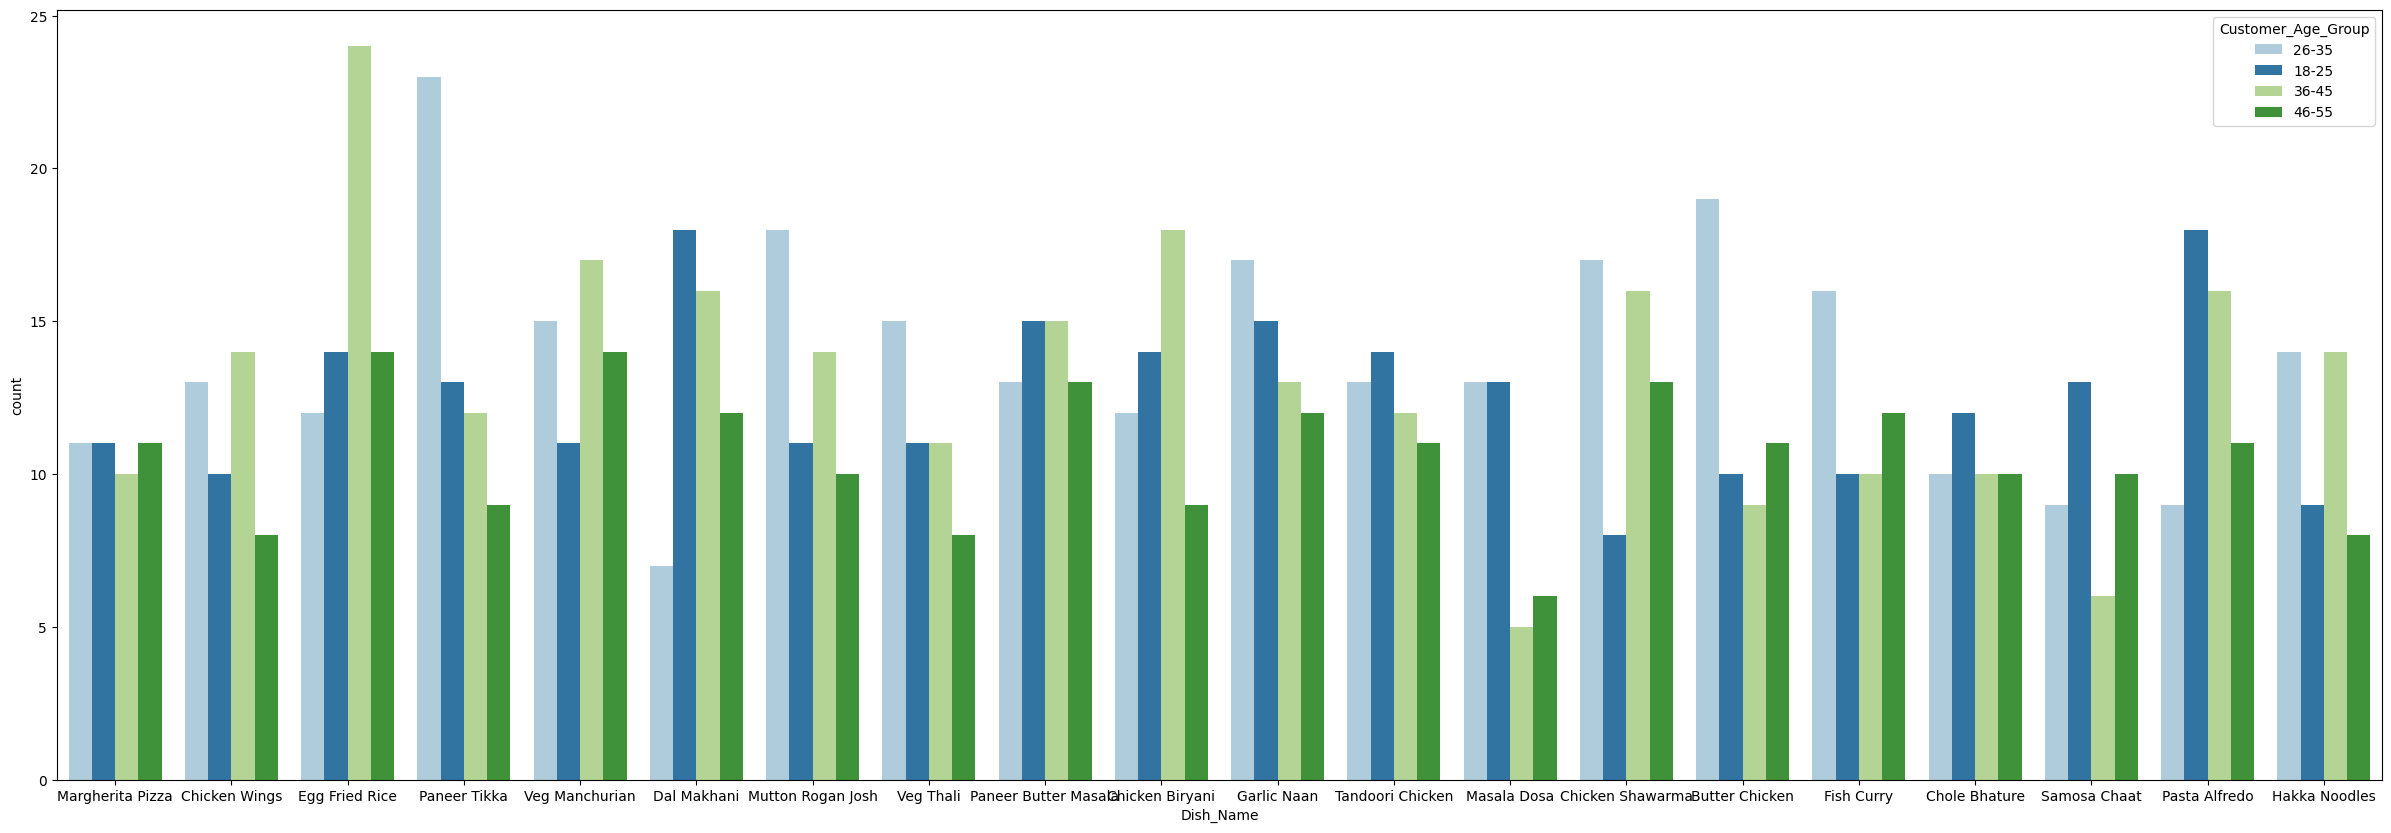

In [52]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'Dish_Name', data = df, hue = 'Customer_Age_Group', palette='Paired')
plt.show()

**Distribution of Payment Methods by Customer Location**

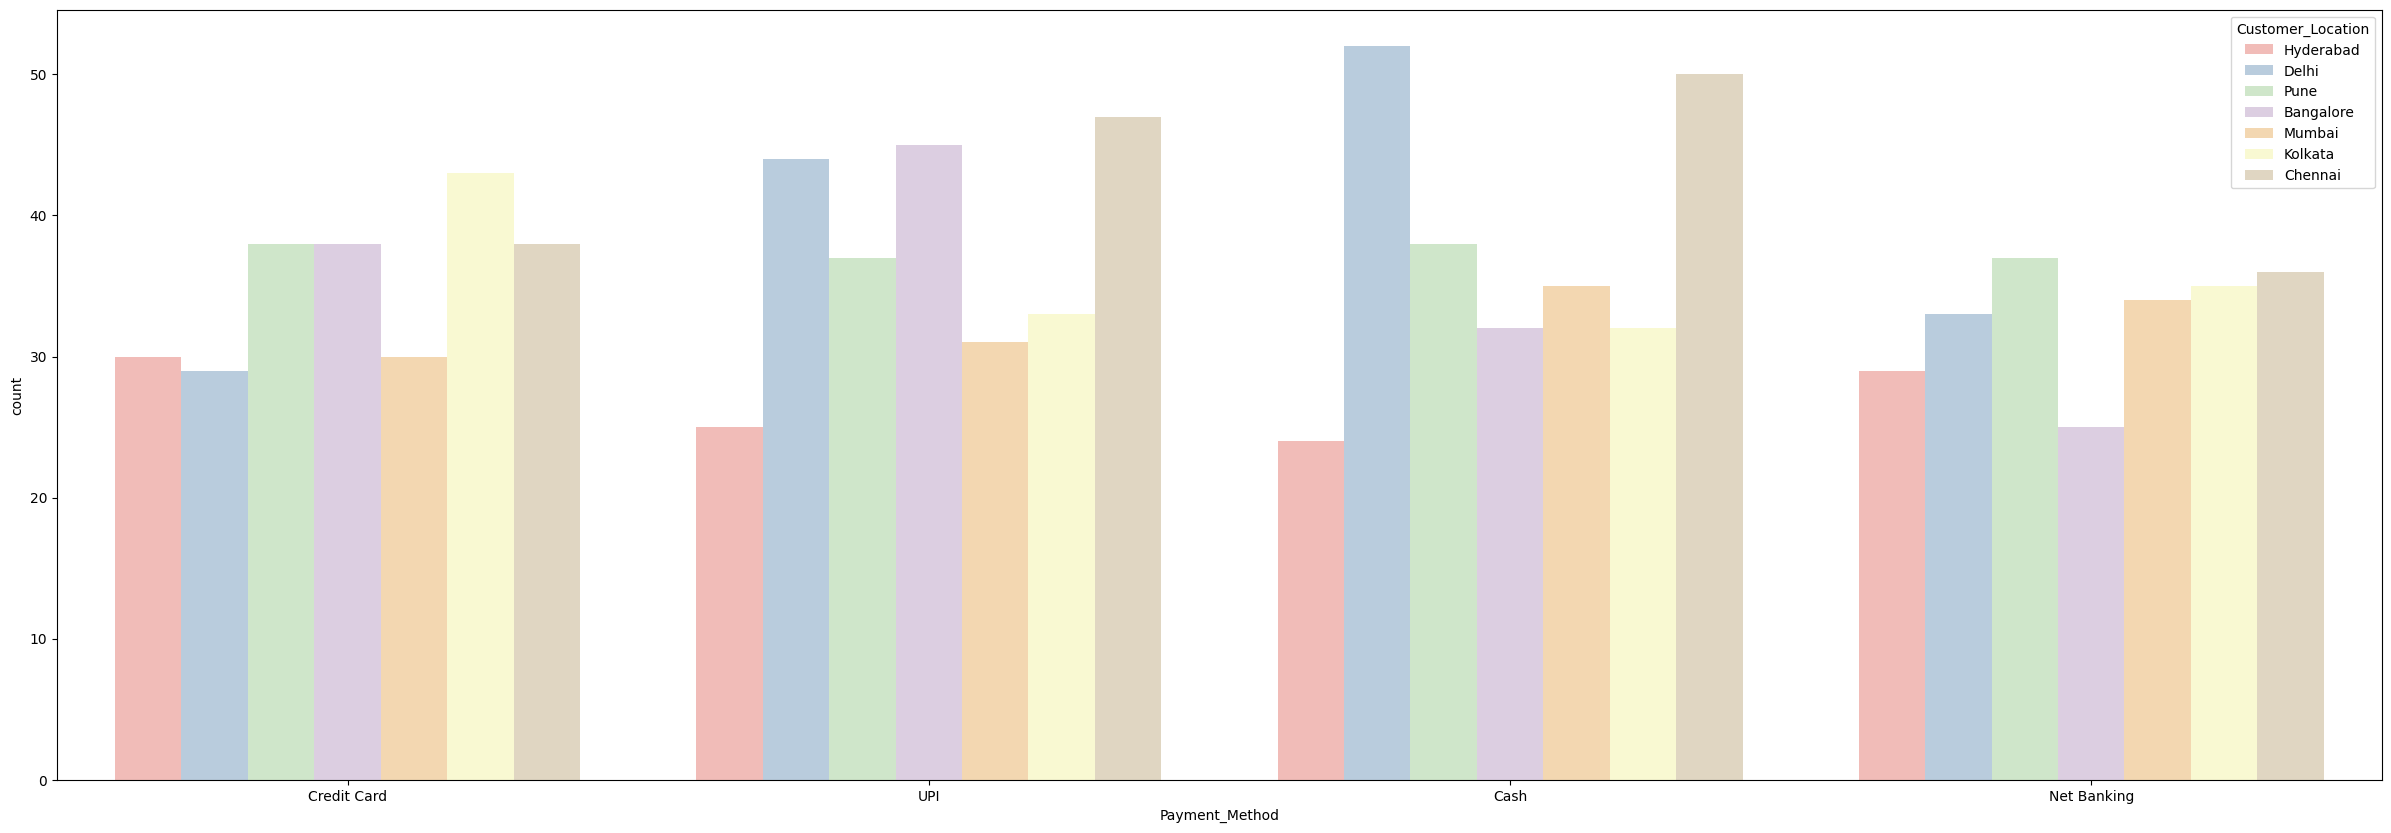

In [53]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'Payment_Method', data = df, hue = 'Customer_Location', palette='Pastel1')
plt.show()

**Average Total Amount Spent by Customer Location**

In [54]:
df.groupby('Customer_Location')['Total_Amount'].mean()

,Total_Amount
Customer_Location,
Bangalore,563.472214
Chennai,572.924035
Delhi,603.324304
Hyderabad,602.233241
Kolkata,587.845524
Mumbai,566.911000
Pune,577.484533


**Order Status Breakdown by Customer Location**

In [55]:
df.groupby('Customer_Location')['Order_Status'].value_counts()

Customer_Location  Order_Status
Bangalore          Completed       131
                   Cancelled         9
Chennai            Completed       160
                   Cancelled        11
Delhi              Completed       152
                   Cancelled         6
Hyderabad          Completed        99
                   Cancelled         9
Kolkata            Completed       130
                   Cancelled        13
Mumbai             Completed       121
                   Cancelled         9
Pune               Completed       137
                   Cancelled        13
Name: count, dtype: int64

**Average Customer Rating for Cancelled Orders**

In [56]:
df[df['Order_Status'] == 'Cancelled']['Customer_Rating'].mean()

4.051428571428571

**Minimum Customer Rating for Cancelled Orders**

In [57]:
df[df['Order_Status'] == 'Cancelled']['Customer_Rating'].min()

3.0

**Maximum Customer Rating for Cancelled Orders**

In [58]:
df[df['Order_Status'] == 'Cancelled']['Customer_Rating'].max()

5.0

**Average Customer Rating for Completed Orders**

In [59]:
df[df['Order_Status'] == 'Completed']['Customer_Rating'].mean()

4.032150537634408

**Minimum Customer Rating for Completed Orders**

In [60]:
df[df['Order_Status'] == 'Completed']['Customer_Rating'].min()

3.0

**Maximum Customer Rating for Completed Orders**

In [61]:
df[df['Order_Status'] == 'Completed']['Customer_Rating'].max()

5.0

**Frequency of Customer Ratings for Completed Orders**

In [62]:
df[df['Order_Status'] == 'Completed']['Customer_Rating'].value_counts()

,count
Customer_Rating,
3.8,87
3.4,80
4.4,74
4.9,54
3.1,50
3.5,49
4.7,47
4.8,45
4.2,44


**Frequency of Customer Ratings for Cancelled Orders**

In [63]:
df[df['Order_Status'] == 'Cancelled']['Customer_Rating'].value_counts()

,count
Customer_Rating,
3.8,9
4.9,7
3.1,5
3.4,5
4.1,4
4.3,4
4.8,4
5.0,3
4.2,3


**Distribution of Payment Methods by Customer Age Group**

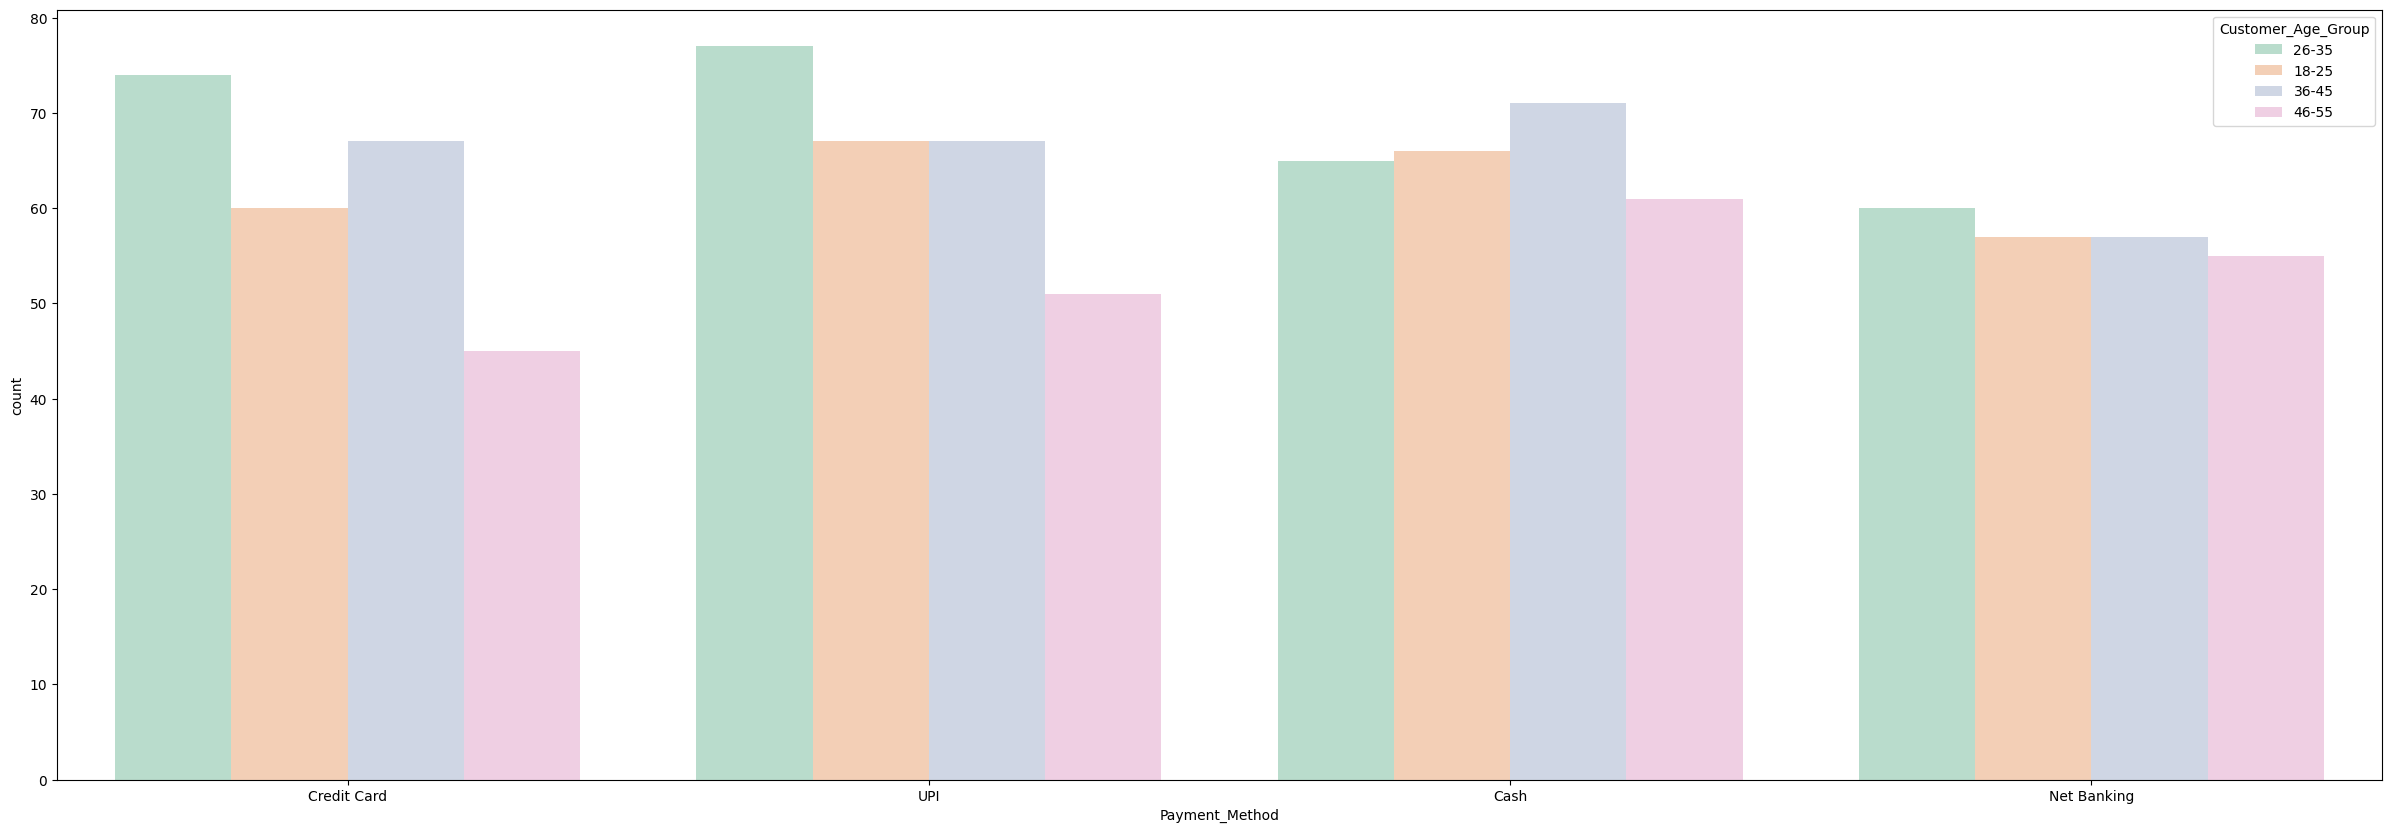

In [64]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'Payment_Method', data = df, hue = 'Customer_Age_Group', palette='Pastel2')
plt.show()

**Order Status Breakdown by Customer Age Group**

In [65]:
df.groupby('Customer_Age_Group')['Order_Status'].value_counts()

Customer_Age_Group  Order_Status
18-25               Completed       230
                    Cancelled        20
26-35               Completed       254
                    Cancelled        22
36-45               Completed       245
                    Cancelled        17
46-55               Completed       201
                    Cancelled        11
Name: count, dtype: int64

**Distribution of Dishes Ordered by Customer Location**

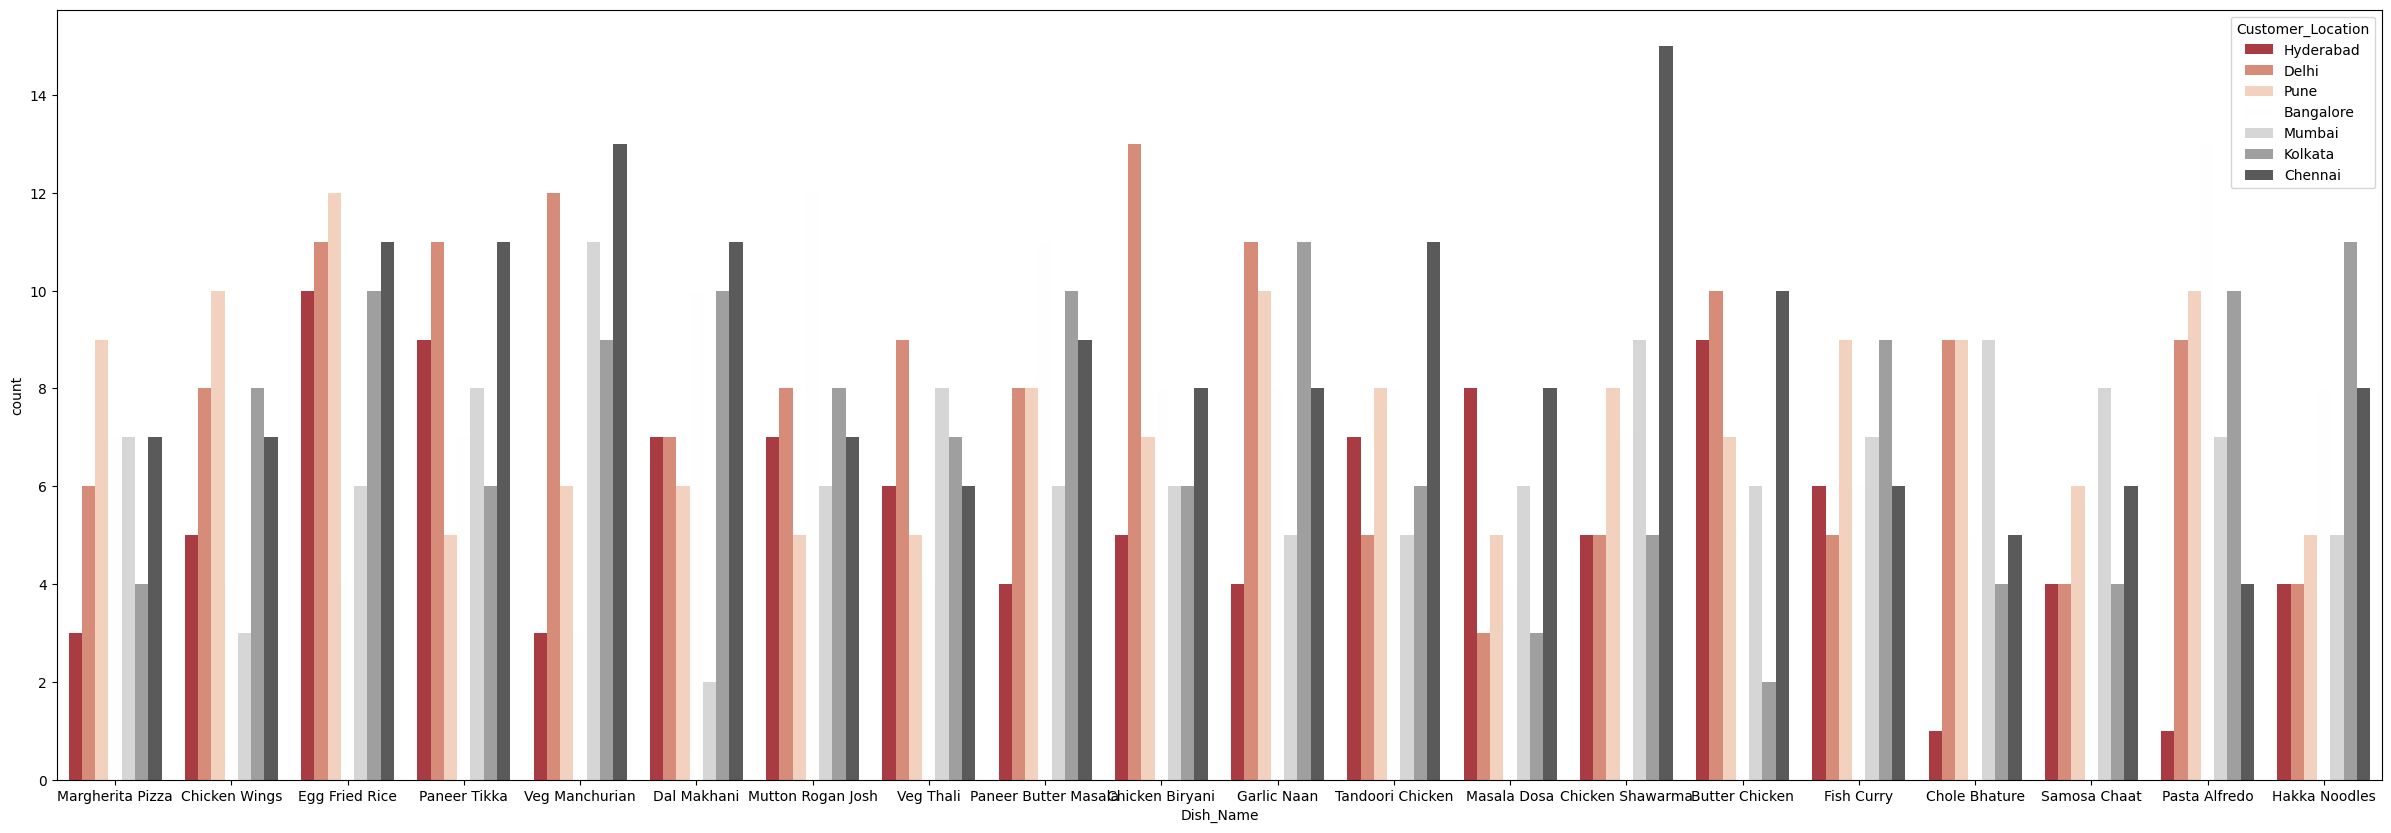

In [66]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'Dish_Name', data = df, hue = 'Customer_Location', palette='RdGy')
plt.show()

# **Merging Orders and Restaurants Data on Restaurant_ID**

In [67]:
df2 = pd.merge(left = orders, right = restaurants, on = 'Restaurant_ID', how = 'inner')
df2

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February,8,Wasabi by Morimoto,Pune,Mexican,221,4.1,396,10:00-23:00
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January,18,Al Jawahar,Kolkata,"Indian, Chinese",230,3.2,392,09:00-23:00
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August,12,Faasos,Kolkata,Continental,807,4.7,268,11:00-22:30
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February,22,China Garden,Mumbai,Fast Food,498,3.2,93,00:00-23:59
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June,12,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August,18,China Garden,Mumbai,Fast Food,498,3.2,93,00:00-23:59
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October,0,Byblos,Mumbai,Japanese,388,3.4,374,10:00-22:30
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July,6,Al Jawahar,Kolkata,"Indian, Chinese",230,3.2,392,09:00-23:00
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March,12,Barbeque Nation,Kolkata,Japanese,578,3.8,390,09:00-23:00


**Top 10 Most Popular Restaurants by Number of Orders**

In [68]:
df2['Name'].value_counts()[:10]

,count
Name,
Faasos,47
Zitomer,42
Mahesh Lunch Home,41
Byblos,32
Olive Bistro,32
Biryani By Kilo,30
Domino's Pizza,30
Smoke House Deli,29
ITC Grand Chola,28


**Frequency of Cuisine Types in Restaurants**

In [69]:
df2['Cuisine_Types'].value_counts()

,count
Cuisine_Types,
American,215
Continental,176
"Indian, Chinese",170
Japanese,117
"Italian, Indian",93
Thai,82
Fast Food,76
Mexican,71


**Average Ratings by Restaurant Name**

In [70]:
df2.groupby('Name')['Ratings'].mean()

,Ratings
Name,
A Reverie,3.100000
Al Jawahar,3.525000
Anjappar Chettinad,3.200000
Barbeque Central,3.600000
Barbeque Nation,3.800000
...,...
Wasabi by Morimoto,4.100000
Wow Momo,3.916667
Wow! China,3.800000


**Average Cost for Two by Restaurant Name**

In [71]:
df2.groupby('Name')['Avg_Cost_for_Two'].mean()

,Avg_Cost_for_Two
Name,
A Reverie,523.000000
Al Jawahar,307.571429
Anjappar Chettinad,326.000000
Barbeque Central,506.000000
Barbeque Nation,578.000000
...,...
Wasabi by Morimoto,221.000000
Wow Momo,746.250000
Wow! China,346.000000


**Order Status Breakdown by Restaurant Name**

In [72]:
df2.groupby('Name')['Order_Status'].value_counts()

Name                Order_Status
A Reverie           Completed       12
                    Cancelled        2
Al Jawahar          Completed       24
                    Cancelled        4
Anjappar Chettinad  Completed        3
                                    ..
Wow Momo            Cancelled        4
Wow! China          Completed       12
Yauatcha            Completed        7
Zitomer             Completed       39
                    Cancelled        3
Name: count, Length: 97, dtype: int64

**Payment Method Breakdown by Restaurant Name**

In [73]:
df2.groupby('Name')['Payment_Method'].value_counts()

Name        Payment_Method
A Reverie   Credit Card        4
            UPI                4
            Cash               3
            Net Banking        3
Al Jawahar  Cash              10
                              ..
Yauatcha    UPI                1
Zitomer     UPI               12
            Net Banking       11
            Credit Card       10
            Cash               9
Name: count, Length: 234, dtype: int64

**Restaurant Distribution for Each Dish Ordered**

In [74]:
df2.groupby('Dish_Name')['Name'].value_counts()

Dish_Name       Name                   
Butter Chicken  Mahesh Lunch Home          5
                Byblos                     4
                Al Jawahar                 3
                Le Cirque                  3
                Mainland China             3
                                          ..
Veg Thali       The Great Kebab Factory    1
                Wasabi by Morimoto         1
                Wow! China                 1
                Yauatcha                   1
                Zitomer                    1
Name: count, Length: 648, dtype: int64

# **Merging Orders, Restaurants, and Customers Data**

In [75]:
pd.set_option('display.max_columns', None)
df_comb = pd.merge(left = orders, right = restaurants, on = 'Restaurant_ID', how = 'inner')
df_final = pd.merge(left = df_comb, right = customers, on = 'Customer_ID', how = 'inner')
df_final

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February,8,Wasabi by Morimoto,Pune,Mexican,221,4.1,396,10:00-23:00,Hyderabad,26-35,3.1,Diya Kapoor
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January,18,Al Jawahar,Kolkata,"Indian, Chinese",230,3.2,392,09:00-23:00,Delhi,26-35,4.2,Vivaan Khanna
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August,12,Faasos,Kolkata,Continental,807,4.7,268,11:00-22:30,Pune,26-35,4.7,Ananya Desai
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February,22,China Garden,Mumbai,Fast Food,498,3.2,93,00:00-23:59,Bangalore,18-25,4.4,Isha Reddy
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June,12,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00,Mumbai,18-25,3.8,Ishaan Mehta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August,18,China Garden,Mumbai,Fast Food,498,3.2,93,00:00-23:59,Mumbai,18-25,3.9,Arjun Yadav
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October,0,Byblos,Mumbai,Japanese,388,3.4,374,10:00-22:30,Delhi,36-45,5.0,Saanvi Chopra
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July,6,Al Jawahar,Kolkata,"Indian, Chinese",230,3.2,392,09:00-23:00,Pune,36-45,4.8,Dev Patel
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March,12,Barbeque Nation,Kolkata,Japanese,578,3.8,390,09:00-23:00,Mumbai,26-35,3.6,Arjun Yadav


**Distribution of Cuisine Types by Customer Location**

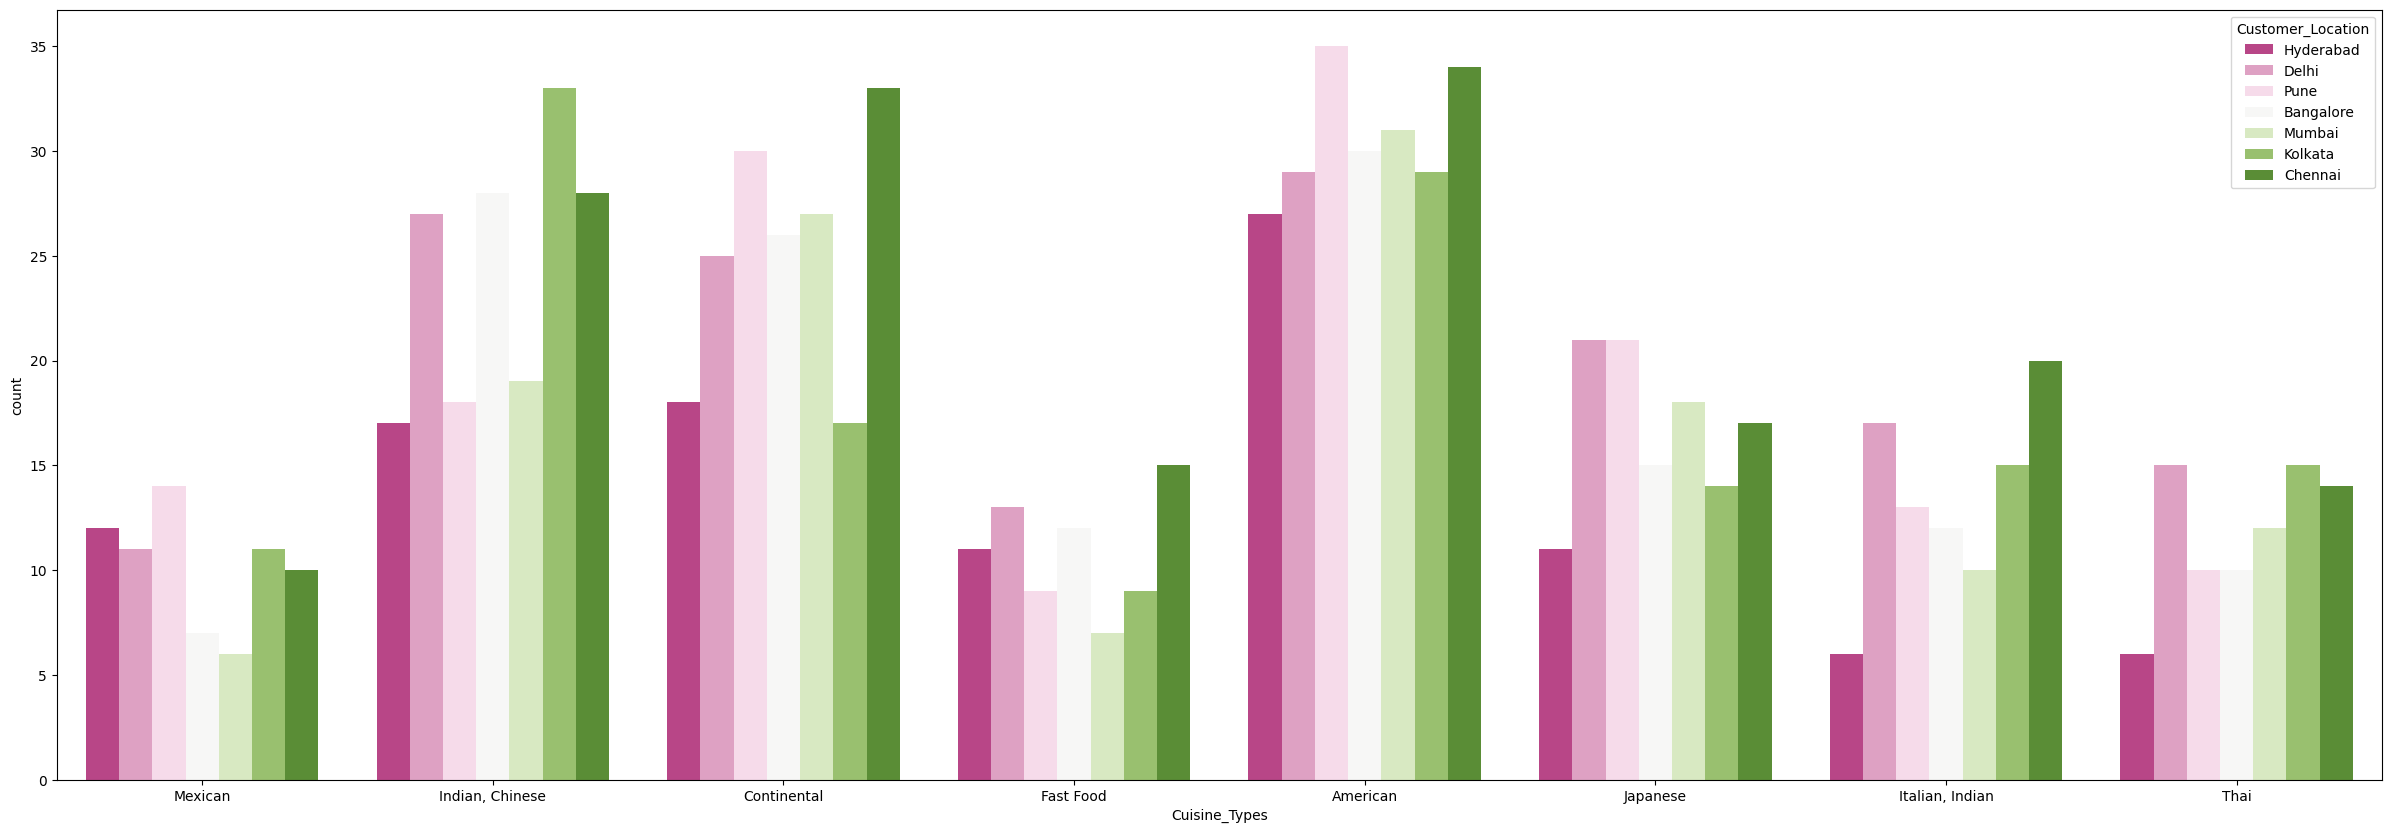

In [76]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'Cuisine_Types', data = df_final, hue = 'Customer_Location', palette='PiYG')
plt.show()

**Distribution of Cuisine Types by Customer Age Group**

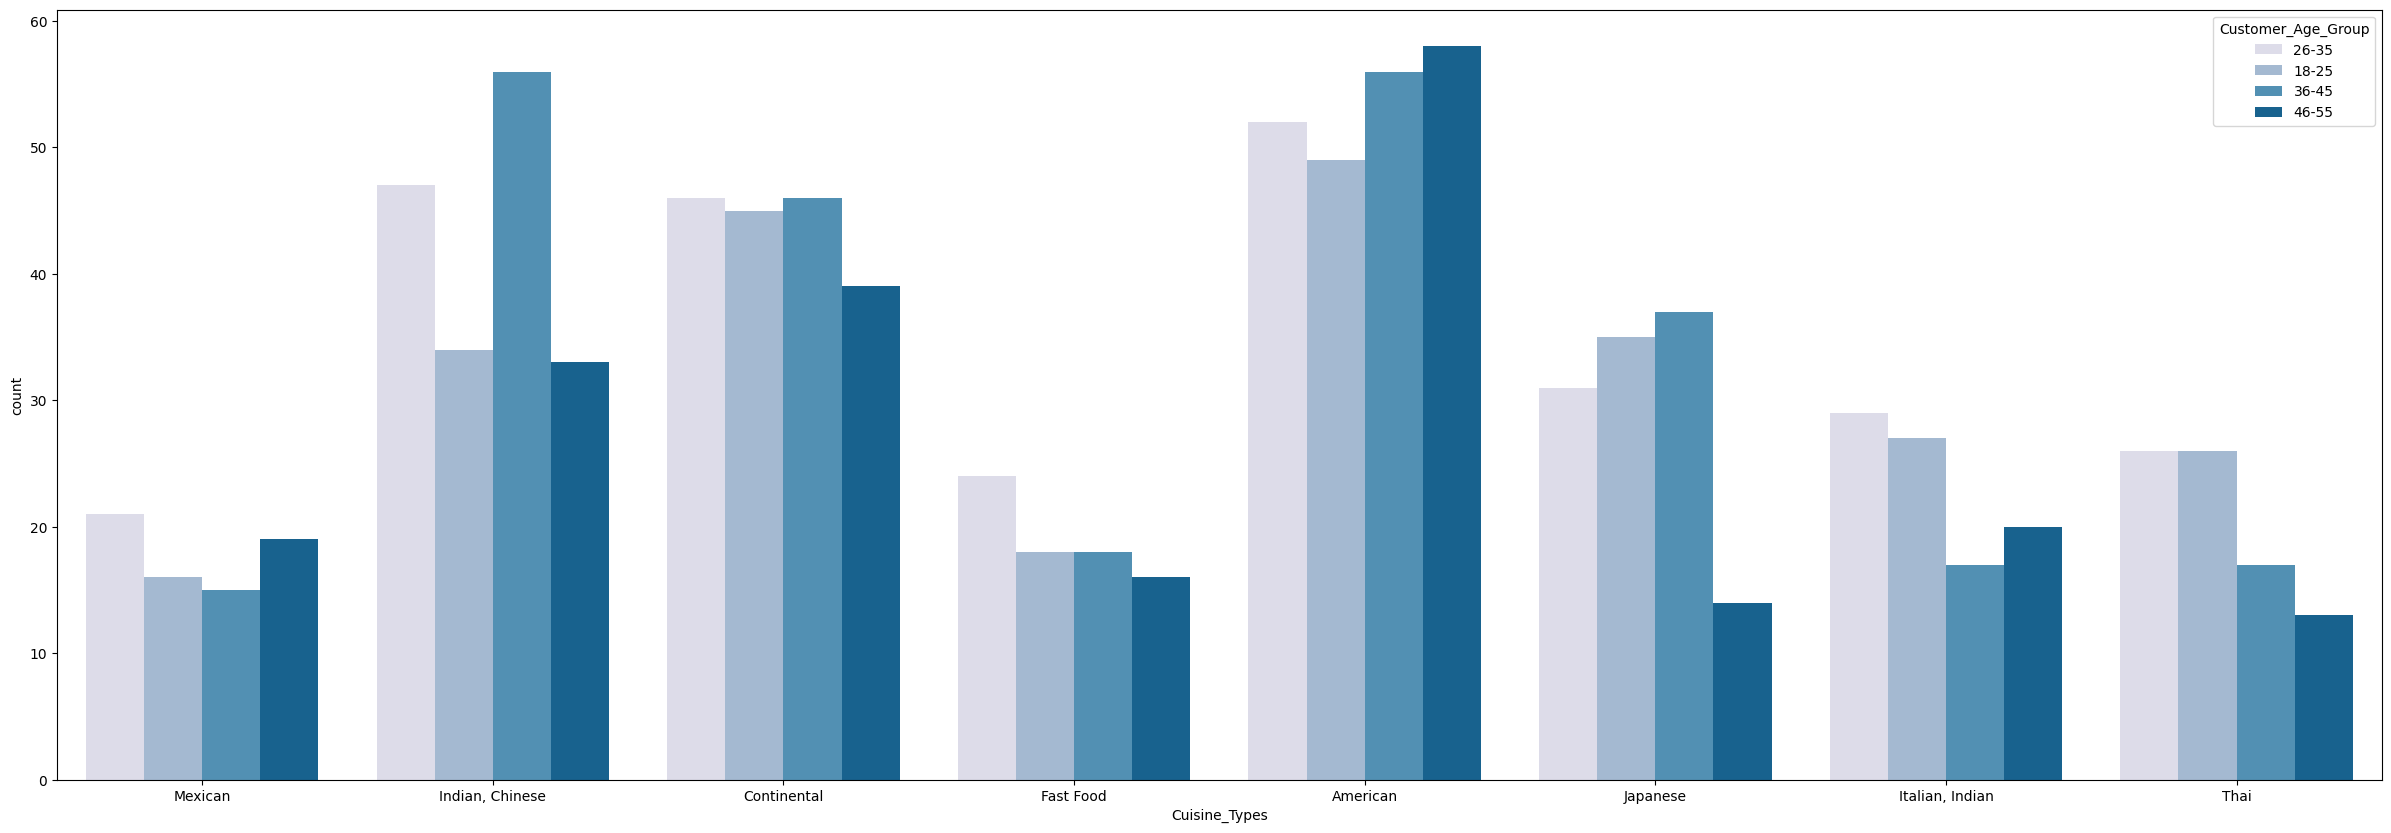

In [77]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'Cuisine_Types', data = df_final, hue = 'Customer_Age_Group', palette='PuBu')
plt.show()